# MMAI 2025 869: Team Project Template
*Updated May 3, 2024*

This notebook serves as a template for the Team Project. Teams can use this notebook as a starting point, and update it successively with new ideas and techniques to improve their model results.

Note that is not required to use this template. Teams may also alter this template in any way they see fit.


# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
print(datetime.datetime.now())

2024-05-29 16:50:40.841182


In [3]:
!which python

'which' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!python --version

Python 3.11.7


In [5]:
!echo $PYTHONPATH

$PYTHONPATH


In [6]:
! pip install --user xgboost
! pip install --user fancyimpute
! pip install --user sklearn-genetic
! pip install --user ipywidgets

# 0. Data Loading and Inspection

## 0.1: Load data

The file containing the labeled training data is conveniently located on the cloud at the address below. Let's load it up and take a look.

In [7]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1eYCKuqJda4bpzXBVnqXylg0qQwvpUuum")
target_feature = 'h1n1_vaccine'

## 0.1 Simple Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21365 entries, 0 to 21364
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 21292 non-null  float64
 1   h1n1_knowledge               21274 non-null  float64
 2   behavioral_antiviral_meds    21306 non-null  float64
 3   behavioral_avoidance         21202 non-null  float64
 4   behavioral_face_mask         21351 non-null  float64
 5   behavioral_wash_hands        21329 non-null  float64
 6   behavioral_large_gatherings  21293 non-null  float64
 7   behavioral_outside_home      21306 non-null  float64
 8   behavioral_touch_face        21263 non-null  float64
 9   doctor_recc_h1n1             19629 non-null  float64
 10  doctor_recc_seasonal         19629 non-null  float64
 11  chronic_med_condition        20594 non-null  float64
 12  child_under_6_months         20710 non-null  float64
 13  health_worker   

In [9]:
# Let's print some descriptive statistics for all the numeric features.

df.describe().T


,count,mean,std,min,25%,50%,75%,max
h1n1_concern,21292.0,1.618026,0.909311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,21274.0,1.265018,0.617816,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,21306.0,0.049329,0.216559,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,21202.0,0.724507,0.446773,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,21351.0,0.070348,0.255739,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,21329.0,0.823574,0.381192,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,21293.0,0.357864,0.479383,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,21306.0,0.337464,0.472856,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,21263.0,0.675728,0.468113,0.0,0.0,1.0,1.0,1.0
doctor_recc_h1n1,19629.0,0.221662,0.415375,0.0,0.0,0.0,0.0,1.0


In [10]:
# What is the number of unique values in all the categorical features? And what is
# the value with the highest frequency?

df.describe(include=object).T

,count,unique,top,freq
age_group,21365,5,65+ Years,5454
education,20240,4,College Graduate,8063
race,21365,4,White,16974
sex,21365,2,Female,12748
income_poverty,17851,3,"<= $75,000, Above Poverty",10301
marital_status,20245,2,Married,10880
rent_or_own,19737,2,Own,15012
employment_status,20203,3,Employed,10886
hhs_geo_region,21365,10,lzgpxyit,3406
census_msa,21365,3,"MSA, Not Principle City",9268


In [11]:
# How much missing data is in each feature?

df.isna().sum()

h1n1_concern                      73
h1n1_knowledge                    91
behavioral_antiviral_meds         59
behavioral_avoidance             163
behavioral_face_mask              14
behavioral_wash_hands             36
behavioral_large_gatherings       72
behavioral_outside_home           59
behavioral_touch_face            102
doctor_recc_h1n1                1736
doctor_recc_seasonal            1736
chronic_med_condition            771
child_under_6_months             655
health_worker                    643
health_insurance                9858
opinion_h1n1_vacc_effective      318
opinion_h1n1_risk                311
opinion_h1n1_sick_from_vacc      321
opinion_seas_vacc_effective      371
opinion_seas_risk                410
opinion_seas_sick_from_vacc      431
age_group                          0
education                       1125
race                               0
sex                                0
income_poverty                  3514
marital_status                  1120
r

### Taking a look at the class imbalance of our target

No vaccine: 16821
Has vaccine: 4544
training_data_pos_scale_weight: 3.7018045774647885


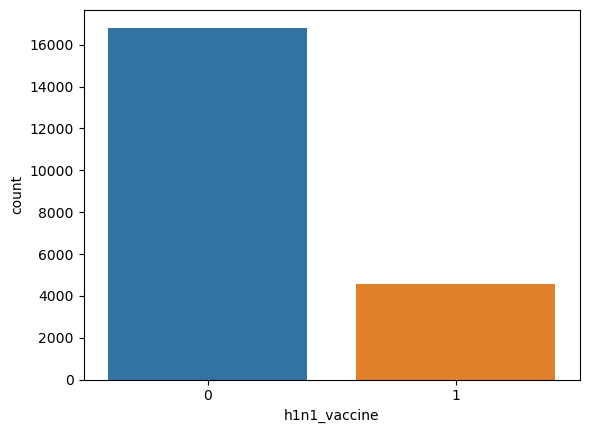

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

def get_target_skew_rate(data_target):
    target_df = pd.DataFrame(data_target)
    sns.countplot(x=target_feature, data=target_df)

    no_vaccine_count = len(target_df[target_df[target_feature]==0])
    yes_vaccine_count = len(target_df[target_df[target_feature]==1])
    print(f"No vaccine: {no_vaccine_count}")
    print(f"Has vaccine: {yes_vaccine_count}")

    # save this for later...
    training_data_pos_scale_weight = (no_vaccine_count / yes_vaccine_count)
    print(f"training_data_pos_scale_weight: {training_data_pos_scale_weight}")
    return training_data_pos_scale_weight

training_data_pos_scale_weight = get_target_skew_rate(df[target_feature])

In [13]:
# For convienience, let's save the names of all numeric features to a list,
# and the names of all categorical features to another list.

numeric_features = [
          "h1n1_concern",
          "h1n1_knowledge",
          "behavioral_antiviral_meds",
          "behavioral_avoidance",
          "behavioral_face_mask",
          "behavioral_wash_hands",
          "behavioral_large_gatherings",
          "behavioral_outside_home",
          "behavioral_touch_face",
          "doctor_recc_h1n1",
          "doctor_recc_seasonal",
          "chronic_med_condition",
          "child_under_6_months",
          "health_worker",
          "health_insurance",
          "opinion_h1n1_vacc_effective",
          "opinion_h1n1_risk",
          "opinion_h1n1_sick_from_vacc",
          "opinion_seas_vacc_effective",
          "opinion_seas_risk",
          "opinion_seas_sick_from_vacc",
          "household_adults",
          "household_children",
]

behavioural_features = list(x for x in numeric_features if 'behavioral' in x)

categorical_features = [
    "age_group",
    "education",
    "race",
    "sex",
    "income_poverty",
    "marital_status",
    "rent_or_own",
    "employment_status",
    "hhs_geo_region",
    "census_msa",
    "employment_industry",
    "employment_occupation",
]

all_features = numeric_features + categorical_features

all_cat_features = categorical_features

continuous_features = [
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
]

### helper method for getting the least correlated items to the target

In [14]:
def get_low_correlations_for_target(data, show_plot = False):
    corr = data.corr()

    threshold = 0.01
    tf_corr = corr[(abs(corr[target_feature]) <= threshold)]
    display(tf_corr)

    if show_plot:
        g = sns.heatmap(corr,  vmax=.3, center=0,
                    square=True, linewidths=1, 
                    cbar_kws={"shrink": .5}, annot=True, 
                    fmt='.2f', cmap='coolwarm')
        sns.despine()
        g.figure.set_size_inches(30,25)
        plt.show()

    return list(tf_corr.index)

## How do each of the behavioural features correlate to the target?

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,h1n1_vaccine


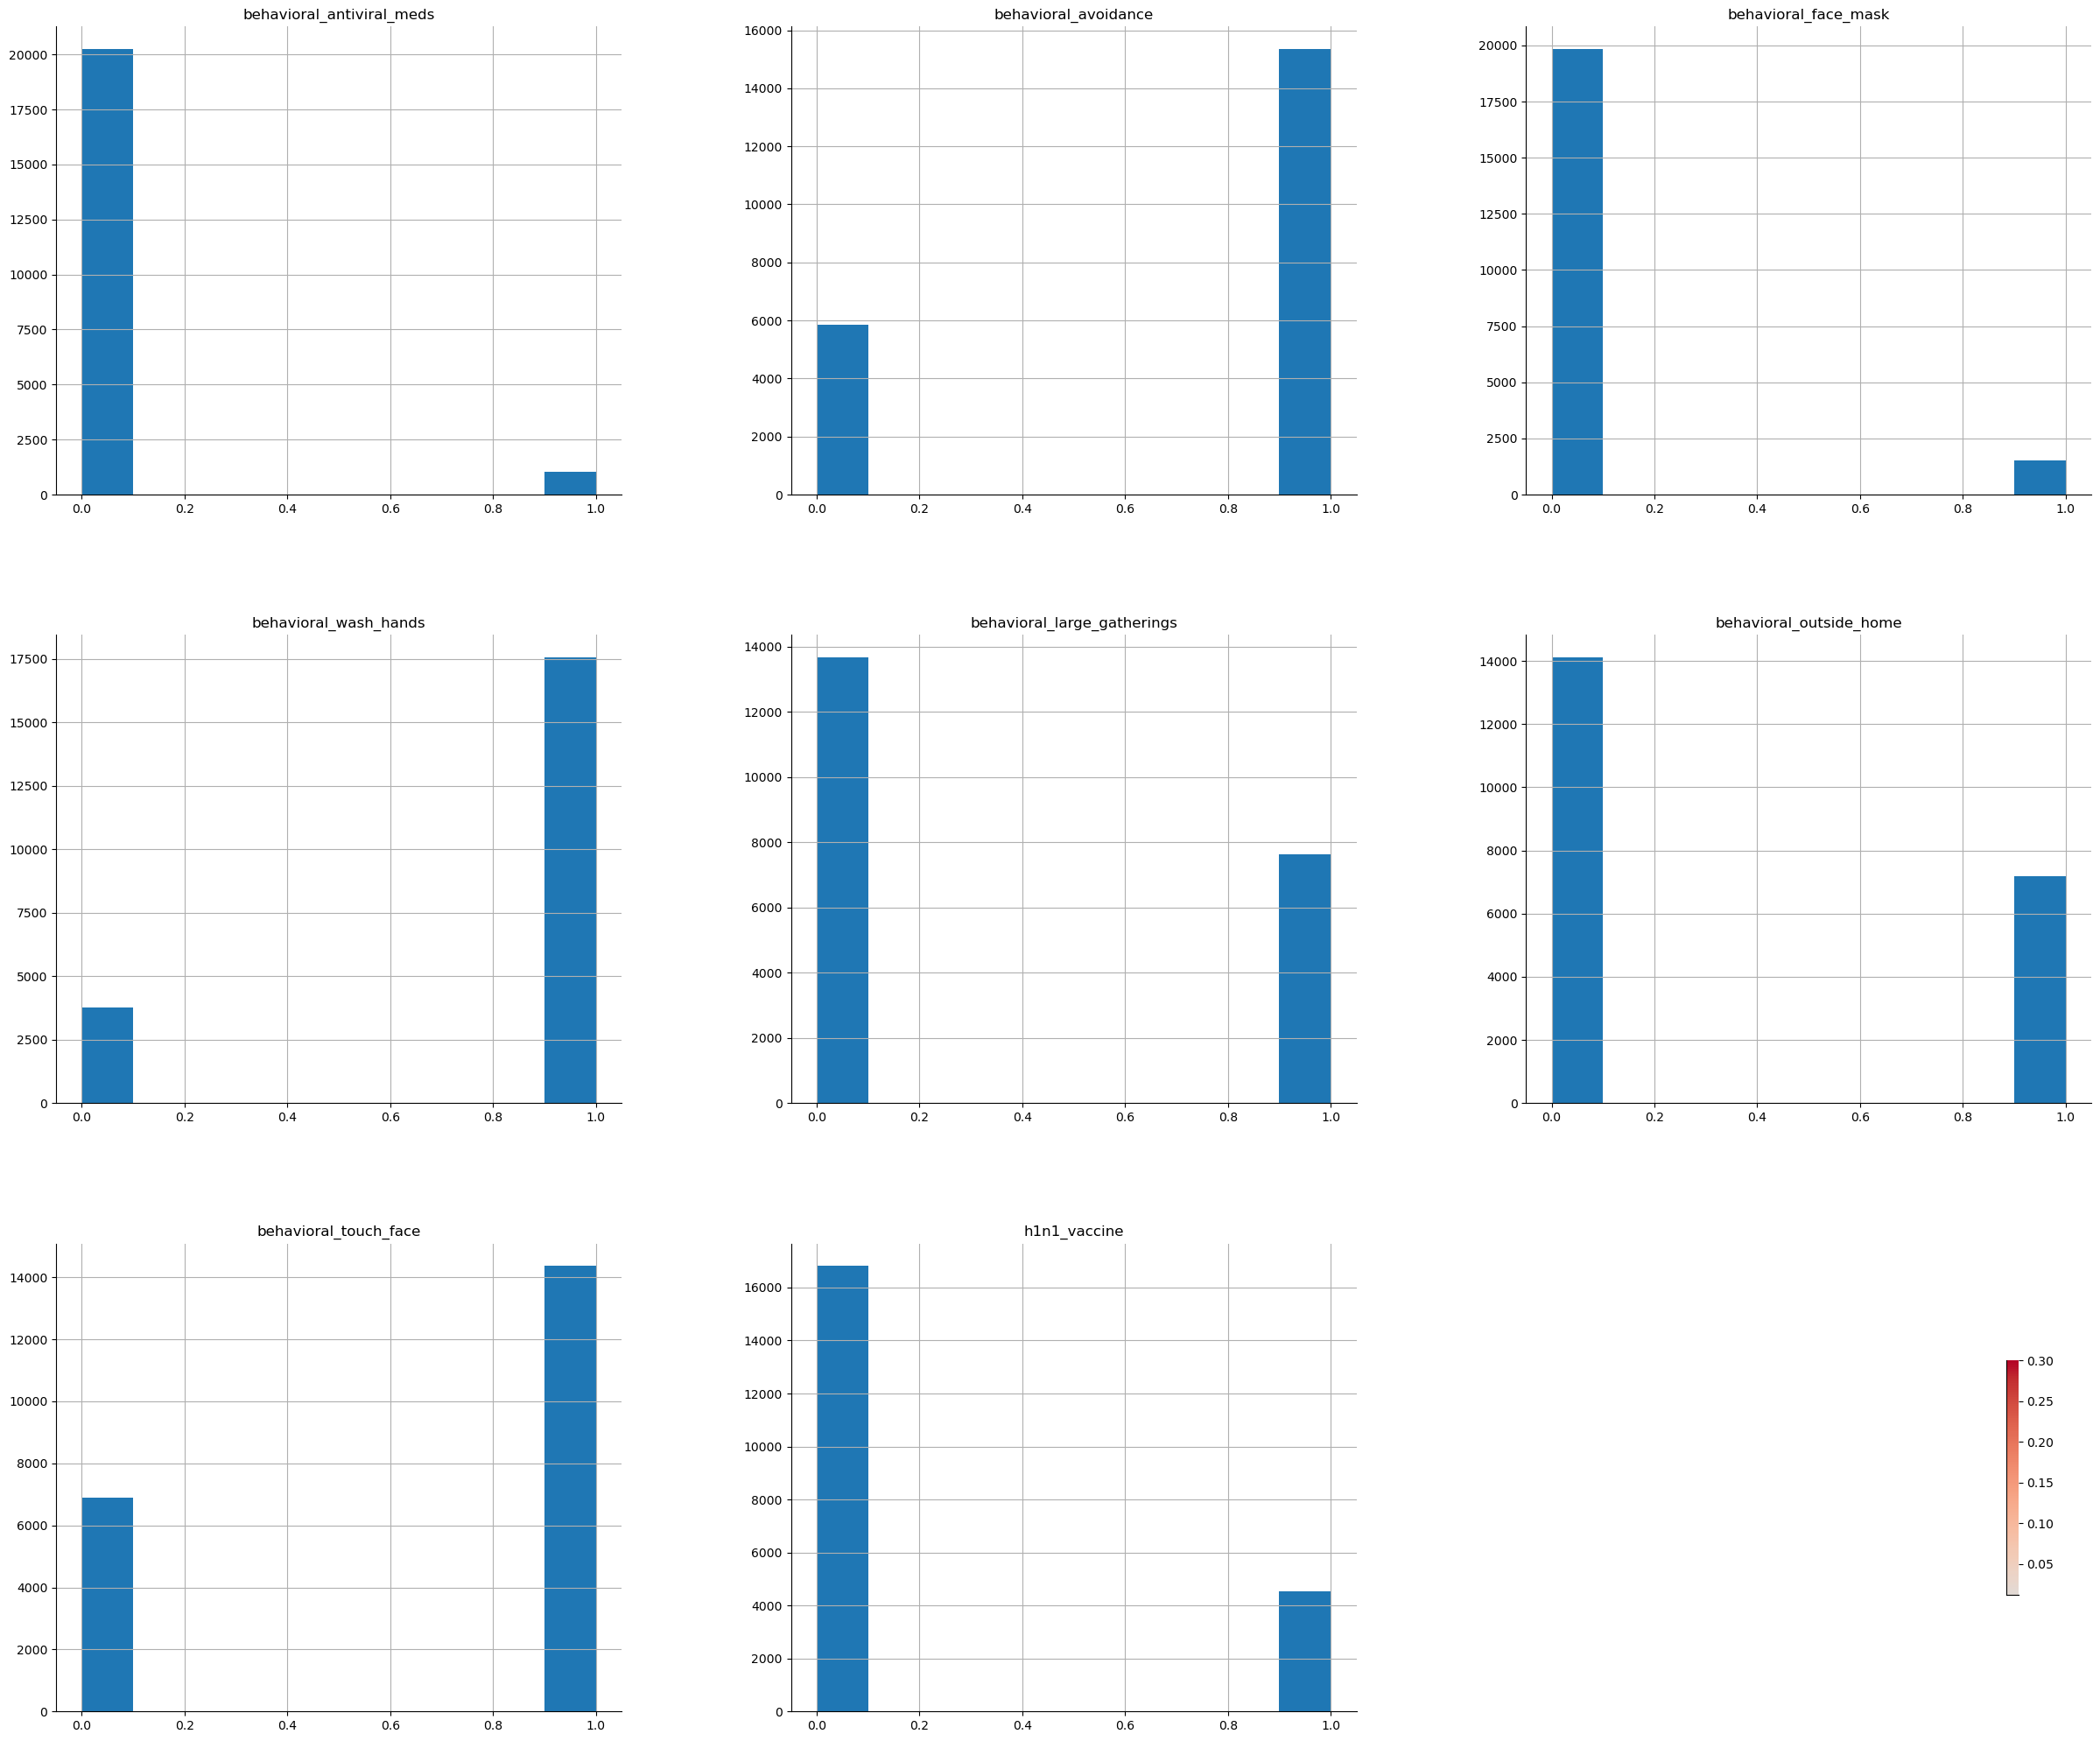

In [15]:
df_bv_target = pd.concat((df[behavioural_features], df[target_feature]), axis=1)
df_bv_target.hist()
get_low_correlations_for_target(df_bv_target, show_plot=True)

# separate these by skewedness in correlation with the target
# so when we FE combine these, it makes sense
behavioural_features_neg = [
          "behavioral_avoidance",
          "behavioral_wash_hands",
          "behavioral_outside_home",
          "behavioral_touch_face",
]

behavioural_features_pos = [x for x in behavioural_features if x not in behavioural_features_neg]


# 1. Train/Test Split

Now we randomly split the available data into train and test subsets.

The training data will later be used to build and assess the model on various combinations of hyperparaters.

The testing data will be used as a "final estimate" of a model's performance.

# 2. Model 1 (A simple DecisionTree model)

As a baseline, we'll do the absolute bare minimum data cleaning and then quickly build a simple Decision Tree.

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
# from sklearn.model_selection import train_test_split
import xgboost as xgb


In [17]:
# Scikit-learn needs us to put the features in one dataframe, and the label in another.
# It's tradition to name these variables X and y, but it doesn't really matter.

X = df.drop(target_feature, axis=1)
y = df[target_feature]

# X[continuous_features].hist()
# X[behavioural_features].hist()

## 1.1 Cleaning and FE

### Feature Encoding / Label Mapping

In [18]:
label_mapping = {}

def apply_label_mapping_fxn(row):
    global label_mapping
    for feature in all_cat_features:
        feature_mapping = label_mapping[feature]
        enc_value = feature_mapping[row[feature]]
        row[feature] = enc_value
    return row

def apply_label_mapping(data):
    return data.apply(apply_label_mapping_fxn, axis=1)

def update_row_mappings(row):
    global label_mapping
    for feature in all_cat_features:
        if not feature in label_mapping:
            label_mapping[feature] = {}
        enc_feature_name = f"{feature}_enc"
        orig_value = row[feature]
        enc_value = row[enc_feature_name]
        label_mapping[feature][orig_value] = enc_value

    return row

def set_label_mapping(orig_data, encoded_data):
    global label_mapping
    map_df = pd.DataFrame()
    for feature in all_cat_features:
        map_df[feature] = orig_data[feature]
        map_df[f"{feature}_enc"] = encoded_data[feature]
    map_df.apply(update_row_mappings, axis=1)

def label_encoding(data):
    global labeled_columns

    import category_encoders as ce
    encoder = ce.JamesSteinEncoder(cols=all_cat_features)
    labeled = encoder.fit_transform(data, y)
    labeled_columns = list(encoder.get_feature_names_out())

    set_label_mapping(data, labeled)

    return labeled


### Imputation

In [19]:
from fancyimpute import SoftImpute

def impute_data(data):
    return pd.DataFrame(SoftImpute(verbose=False).fit_transform(data), columns=data.columns)



### Scale our skewed features (using Box-Cox)

In [20]:
from sklearn.preprocessing import PowerTransformer
display(X[continuous_features].describe().T)

def set_non_zero(row):
    for feature in continuous_features:
        if row[feature] == 0.0:
            row[feature] = 0.00000001
    return row

def set_continuous_features(data):
    # data[continuous_features] = data[continuous_features].apply(set_non_zero, axis=1)

    display(data[continuous_features].describe().T)

    scaler = PowerTransformer(method='yeo-johnson')
    scaler.fit(data[continuous_features])
    data[continuous_features] = scaler.transform(data[continuous_features])
    # data[continuous_features].hist()
    return data

,count,mean,std,min,25%,50%,75%,max
opinion_h1n1_vacc_effective,21047.0,3.848910,1.008976,1.0,3.0,4.0,5.0,5.0
opinion_h1n1_risk,21054.0,2.345730,1.287865,1.0,1.0,2.0,4.0,5.0
opinion_h1n1_sick_from_vacc,21044.0,2.361196,1.362904,1.0,1.0,2.0,4.0,5.0
opinion_seas_vacc_effective,20994.0,4.029532,1.082279,1.0,4.0,4.0,5.0,5.0
opinion_seas_risk,20955.0,2.722023,1.385780,1.0,2.0,2.0,4.0,5.0
opinion_seas_sick_from_vacc,20934.0,2.121286,1.335174,1.0,1.0,2.0,4.0,5.0


### Feature Engineering

In [21]:
def feature_engineering(data):
    data['insured_family_size'] = data['household_adults'] + data['health_insurance'] + data['household_children']
    data['at_risk_patient'] = data['doctor_recc_h1n1'] + data['doctor_recc_seasonal'] + data['chronic_med_condition']

    data['behavioral_risk_neg'] = data[behavioural_features_neg].sum(axis=1)
    data['behavioral_risk_pos'] = data[behavioural_features_pos].sum(axis=1)
    # data = data.drop(behavioural_features, axis=1)

    data['opinion_seas_risk'] = data['opinion_seas_risk'] + data['opinion_seas_sick_from_vacc']
    data['opinion_h1n1'] = data['opinion_h1n1_vacc_effective'] + data['h1n1_concern']
    data['poverty_vs_insurance'] = data['income_poverty'] + data['health_insurance']
    return data


## Correlation mapping...



In [22]:
heatmap_data = pd.concat([label_encoding(X), y], axis=1)
low_correlation_features = get_low_correlations_for_target(heatmap_data)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
opinion_seas_sick_from_vacc,0.222891,-0.064476,0.084385,0.078971,0.101353,0.092033,0.135759,0.137775,0.092923,0.055074,...,-0.028392,-0.089694,-0.040087,-0.030540,-0.004128,0.019630,0.054649,-0.008723,-0.021985,0.000225
census_msa,-0.004295,0.052737,0.008361,0.007260,0.018310,0.004913,-0.052667,-0.041904,-0.022556,0.013221,...,-0.052605,-0.082343,-0.029317,-0.051005,1.000000,-0.002273,0.018309,0.011184,0.018651,0.005751
household_children,0.048426,0.050386,0.087459,0.038914,0.007088,0.049134,-0.012202,-0.014424,0.020550,0.033586,...,0.162315,-0.033011,-0.076230,0.015233,0.018309,0.187856,1.000000,0.017251,0.018737,-0.005867


## Our primary data cleaning / preprocessing pipeline method

In [23]:
def clean_data(data, use_fe=False):
    ret = data
    
    ret = apply_label_mapping(ret)

    ret = impute_data(ret)
    ret = set_continuous_features(ret)

    if use_fe:
        ret = feature_engineering(ret)

    # ret = drop_not_used_ga_features(ret)

    # use our full training set to get the correlation data
    # ret = ret.drop(low_correlation_features, axis=1)

    return ret

cleaned_data = clean_data(X, use_fe=False)


,count,mean,std,min,25%,50%,75%,max
opinion_h1n1_vacc_effective,21365.0,3.824442,1.024825,0.560828,3.0,4.0,5.000000,5.0
opinion_h1n1_risk,21365.0,2.330693,1.285729,0.213785,1.0,2.0,4.000000,5.0
opinion_h1n1_sick_from_vacc,21365.0,2.346082,1.359361,0.245398,1.0,2.0,4.000000,5.0
opinion_seas_vacc_effective,21365.0,4.000288,1.099648,0.585813,4.0,4.0,5.000000,5.0
opinion_seas_risk,21365.0,2.701037,1.383165,0.258922,2.0,2.0,4.000000,5.0
opinion_seas_sick_from_vacc,21365.0,2.104664,1.328436,0.269741,1.0,2.0,2.664399,5.0


In [30]:
cleaned_data

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,...,0.189323,0.234283,0.185397,0.166259,0.191116,0.213315,1.0,0.0,0.209662,0.210373
1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,...,0.247746,0.191351,0.223421,0.215797,0.191116,0.213315,0.0,0.0,0.230139,0.225453
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,...,0.188381,0.234283,0.192875,0.215797,0.221840,0.213315,1.0,1.0,0.154844,0.207180
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.188381,0.191351,0.223421,0.215797,0.240960,0.209042,0.0,0.0,0.183499,0.206045
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.206938,0.191351,0.223421,0.218575,0.223350,0.215127,1.0,1.0,0.209662,0.210373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21360,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,...,0.247746,0.191351,0.223421,0.218575,0.221840,0.215127,0.0,0.0,0.209662,0.210373
21361,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.136308,...,0.206938,0.191351,0.223421,0.166259,0.223350,0.215127,0.0,0.0,0.209662,0.210373
21362,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,0.206938,0.234283,0.223421,0.215797,0.221840,0.209042,1.0,0.0,0.158773,0.166187
21363,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.000000,...,0.247746,0.234283,0.223421,0.215797,0.205361,0.215127,1.0,0.0,0.300026,0.329988


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(cleaned_data,y,test_size=0.30,random_state=42)

In [34]:
x_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
16270,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00000,...,0.188381,0.181250,0.192875,0.187195,0.191116,0.213315,1.0,0.0,0.209662,0.210373
17234,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,...,0.206938,0.191351,0.223421,0.215797,0.213557,0.209042,0.0,0.0,0.183499,0.206045
9625,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.00000,...,0.206938,0.234283,0.185397,0.218575,0.204482,0.215127,1.0,0.0,0.209662,0.210373
10408,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,...,0.206938,0.191351,0.185397,0.215797,0.223350,0.209042,0.0,0.0,0.163376,0.168261
2299,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.17233,...,0.188381,0.181250,0.192875,0.187195,0.240960,0.213315,1.0,2.0,0.209662,0.210373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.00000,...,0.247746,0.234283,0.223421,0.218575,0.191116,0.213315,1.0,3.0,0.209662,0.210373
11964,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00000,...,0.188381,0.181250,0.192875,0.187195,0.191116,0.215127,0.0,0.0,0.209662,0.210373
5390,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.00000,...,0.206938,0.234283,0.223421,0.166259,0.191116,0.209042,2.0,1.0,0.209662,0.210373
860,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.00000,...,0.206938,0.191351,0.223421,0.218575,0.221695,0.215127,0.0,0.0,0.209662,0.210373


In [35]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector

rf = RandomForestClassifier()
from catboost import CatBoostClassifier
sfs = SequentialFeatureSelector(rf,k_features=(1,x_train.shape[1]),forward=True,verbose = 2,scoring='accuracy')
sfs.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   46.6s finished

[2024-05-29 17:10:57] Features: 1/35 -- score: 0.7948512203276497[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   59.9s finished

[2024-05-29 17:11:56] Features: 2/35 -- score: 0.8143095954530258[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  1.0min finished

[2024-05-29 17:12:59] Features: 3/35 -- score: 0.8203276496155132[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(estimator=RandomForestClassifier(),
                          k_features=(1, 35), scoring='accuracy', verbose=2)

In [36]:
dict1 = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
dict1

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(9,)","[0.7997325309261116, 0.8030758943497158, 0.789...",0.794851,"(doctor_recc_h1n1,)",0.007101,0.005525,0.002762
2,"(9, 15)","[0.8154463390170511, 0.8184553660982948, 0.815...",0.81431,"(doctor_recc_h1n1, opinion_h1n1_vacc_effective)",0.004912,0.003821,0.001911
3,"(9, 15, 34)","[0.8238047475760615, 0.8207957204948177, 0.819...",0.820328,"(doctor_recc_h1n1, opinion_h1n1_vacc_effective...",0.005218,0.00406,0.00203
4,"(5, 9, 15, 34)","[0.8268137746573052, 0.8214643931795386, 0.815...",0.820595,"(behavioral_wash_hands, doctor_recc_h1n1, opin...",0.007311,0.005688,0.002844
5,"(5, 9, 15, 18, 34)","[0.8268137746573052, 0.8251420929455032, 0.817...",0.821063,"(behavioral_wash_hands, doctor_recc_h1n1, opin...",0.007524,0.005854,0.002927
6,"(4, 5, 9, 15, 18, 34)","[0.8244734202607823, 0.8241390839184219, 0.819...",0.821264,"(behavioral_face_mask, behavioral_wash_hands, ...",0.005958,0.004636,0.002318
7,"(2, 4, 5, 9, 15, 18, 34)","[0.8248077566031428, 0.8254764292878636, 0.816...",0.820796,"(behavioral_antiviral_meds, behavioral_face_ma...",0.005483,0.004266,0.002133
8,"(2, 4, 5, 9, 15, 16, 18, 34)","[0.8294884653961886, 0.8221330658642595, 0.818...",0.820929,"(behavioral_antiviral_meds, behavioral_face_ma...",0.007973,0.006203,0.003102
9,"(2, 4, 5, 9, 14, 15, 16, 18, 34)","[0.843530591775326, 0.8207957204948177, 0.8298...",0.829823,"(behavioral_antiviral_meds, behavioral_face_ma...",0.010162,0.007906,0.003953
10,"(2, 4, 5, 9, 14, 15, 16, 18, 33, 34)","[0.8438649281176864, 0.8261451019725844, 0.834...",0.832096,"(behavioral_antiviral_meds, behavioral_face_ma...",0.008933,0.00695,0.003475


In [37]:
sfs.k_score_

0.8502173186225344

In [38]:
sfs.k_feature_names_

('h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'education',
 'race',
 'marital_status',
 'rent_or_own',
 'hhs_geo_region',
 'household_adults',
 'household_children',
 'employment_industry',
 'employment_occupation')

(<Figure size 1500x600 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

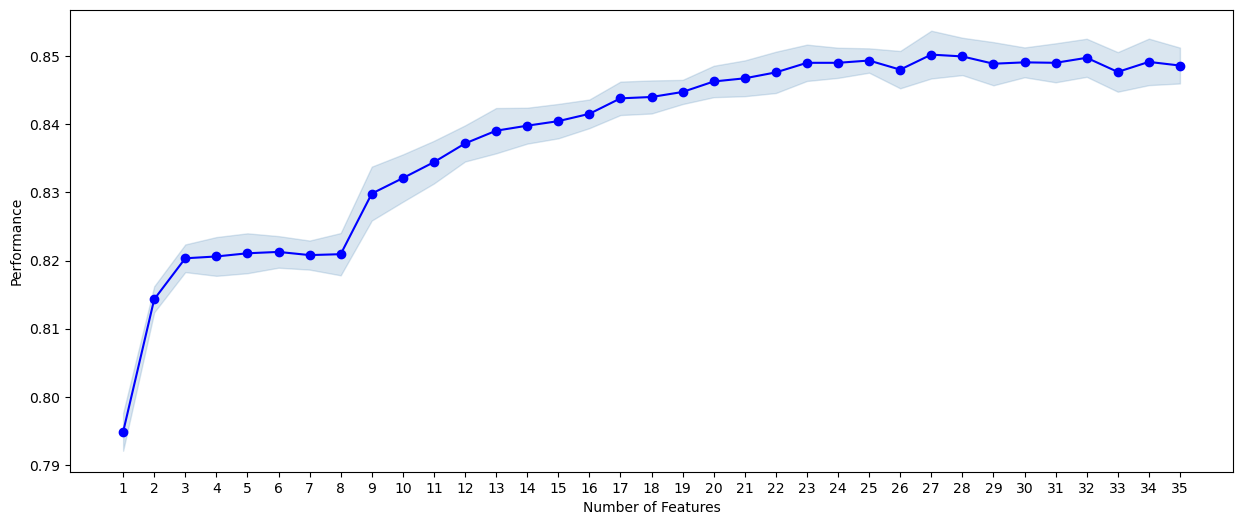

In [39]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(15,6))

In [64]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt

def display_cv(classifier, data, truth):
    classifier.fit(data, truth)
    predicted = classifier.predict(data)

    # We use cross_validate to perform K-fold cross validation for us.
    cv_results = cross_validate(classifier, data, truth, cv=5, scoring="f1_macro")
    f1_score = np.mean(cv_results['test_score'])
    display(f"results f1: {f1_score}")

    print(classification_report(truth, predicted))
    print(f"auc: {roc_auc_score(truth, predicted)}")

    confusion_matrix = metrics.confusion_matrix(truth, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
    cm_display.plot()
    plt.show()   

In [40]:
x_train = x_train.iloc[:,list(sfs.k_feature_idx_)]
x_test = x_test.iloc[:,list(sfs.k_feature_idx_)]

In [78]:
x_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,doctor_recc_h1n1,doctor_recc_seasonal,...,opinion_seas_sick_from_vacc,education,race,marital_status,rent_or_own,hhs_geo_region,household_adults,household_children,employment_industry,employment_occupation
16270,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.00000,0.000000,...,0.364841,0.190783,0.211317,0.181250,0.192875,0.191116,1.0,0.0,0.209662,0.210373
17234,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00000,0.000000,...,-1.000654,0.237200,0.218508,0.191351,0.223421,0.213557,0.0,0.0,0.183499,0.206045
9625,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.00000,1.000000,...,1.352926,0.237200,0.211317,0.234283,0.185397,0.204482,1.0,0.0,0.209662,0.210373
10408,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00000,0.000000,...,-1.000654,0.237200,0.218508,0.191351,0.185397,0.223350,0.0,0.0,0.163376,0.168261
2299,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.17233,0.241367,...,0.363238,0.190783,0.218508,0.181250,0.192875,0.240960,1.0,2.0,0.209662,0.210373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.00000,0.000000,...,0.363238,0.190441,0.211317,0.234283,0.223421,0.191116,1.0,3.0,0.209662,0.210373
11964,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,-1.000654,0.190783,0.160954,0.181250,0.192875,0.191116,0.0,0.0,0.209662,0.210373
5390,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.00000,1.000000,...,1.581371,0.211880,0.218508,0.234283,0.223421,0.191116,2.0,1.0,0.209662,0.210373
860,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.00000,1.000000,...,-1.000654,0.190441,0.218508,0.191351,0.223421,0.221695,0.0,0.0,0.209662,0.210373


In [43]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)
rf.score(x_train,y_train)
y_pred = rf.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [48]:

print("------------------RandomForest Classifier---------------------------------")
print("For Y variable")
print("---------------------------------------------------------------------")
print(f'the Accuracy score for H1N1 vaccine : {accuracy_score(y_test,y_pred)}')
print("---------------------------------------------------------------------")
print(f'the classification report for H1N1 vaccine : {classification_report(y_test,y_pred)}')
print("---------------------------------------------------------------------")
print(f'the confusion matrix for H1N1 vaccine : {confusion_matrix(y_test,y_pred)}')
print("---------------------------------------------------------------------")

------------------RandomForest Classifier---------------------------------
For Y variable
---------------------------------------------------------------------
the Accuracy score for H1N1 vaccine : 0.8500780031201248
---------------------------------------------------------------------
the classification report for H1N1 vaccine :               precision    recall  f1-score   support

           0       0.87      0.95      0.91      5024
           1       0.73      0.48      0.58      1386

    accuracy                           0.85      6410
   macro avg       0.80      0.72      0.74      6410
weighted avg       0.84      0.85      0.84      6410

---------------------------------------------------------------------
the confusion matrix for H1N1 vaccine : [[4784  240]
 [ 721  665]]
---------------------------------------------------------------------


In [49]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train,y_train)
xg.score(x_train,y_train)
xg.score(x_test,y_test)
y_pred = xg.predict(x_test)

In [50]:
print("------------------XGB Classifier---------------------------------")
print("For Y variable")
print("---------------------------------------------------------------------")
print(f'the Accuracy score for H1N1 vaccine : {accuracy_score(y_test,y_pred)}')
print("---------------------------------------------------------------------")
print(f'the classification report for H1N1 vaccine : {classification_report(y_test,y_pred)}')
print("---------------------------------------------------------------------")
print(f'the confusion matrix for H1N1 vaccine : {confusion_matrix(y_test,y_pred)}')
print("---------------------------------------------------------------------")

------------------XGB Classifier---------------------------------
For Y variable
---------------------------------------------------------------------
the Accuracy score for H1N1 vaccine : 0.8472698907956319
---------------------------------------------------------------------
the classification report for H1N1 vaccine :               precision    recall  f1-score   support

           0       0.88      0.94      0.91      5024
           1       0.70      0.52      0.60      1386

    accuracy                           0.85      6410
   macro avg       0.79      0.73      0.75      6410
weighted avg       0.84      0.85      0.84      6410

---------------------------------------------------------------------
the confusion matrix for H1N1 vaccine : [[4711  313]
 [ 666  720]]
---------------------------------------------------------------------


In [80]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import f1_score



def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3),
        'max_depth': trial.suggest_int("max_depth", 2, 10),
        'min_child_weight': trial.suggest_int("min_child_weight", 1, 10),
        'subsample': trial.suggest_float("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 1.0),
        'gamma': trial.suggest_float("gamma", 0.0, 0.5),
        'reg_alpha': trial.suggest_loguniform("reg_alpha", 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform("reg_lambda", 1e-8, 10.0),
    }
    model = XGBClassifier(**param, use_label_encoder=False, eval_metric='logloss')
    model.fit(x_train, y_train, early_stopping_rounds=50, eval_set=[(x_test, y_test)], verbose=False)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='weighted') 
    return f1


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)


best_params = study.best_params
print("Best Parameters: ", best_params)
print("Best F1 Score: ", study.best_value)


best_model_XGB = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_model_XGB.fit(x_train, y_train, early_stopping_rounds=50, eval_set=[(x_test, y_test)], verbose=True)


y_pred = best_model_XGB.predict(x_test)
final_f1 = f1_score(y_test, y_pred, average='weighted') 
print("Final F1 Score on Test Set: ", final_f1)


[I 2024-05-29 20:00:33,301] A new study created in memory with name: no-name-e41e915f-e45a-49a2-86e9-6c5e9d2bc7bf
C:\Users\俊俊\AppData\Local\Temp\ipykernel_25752\2289967975.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform("reg_alpha", 1e-8, 10.0),
C:\Users\俊俊\AppData\Local\Temp\ipykernel_25752\2289967975.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform("reg_lambda", 1e-8, 10.0),
C:\Users\俊俊\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stoppin

Best Parameters:  {'n_estimators': 500, 'learning_rate': 0.05853677397055986, 'max_depth': 9, 'min_child_weight': 9, 'subsample': 0.7864773290198578, 'colsample_bytree': 0.7497746343514877, 'gamma': 0.3115464001764693, 'reg_alpha': 0.04368002699194678, 'reg_lambda': 4.402476744615238}
Best F1 Score:  0.8492877968356741
[0]	validation_0-logloss:0.51050
[1]	validation_0-logloss:0.49794
[2]	validation_0-logloss:0.48691
[3]	validation_0-logloss:0.47483
[4]	validation_0-logloss:0.46640
[5]	validation_0-logloss:0.45714
[6]	validation_0-logloss:0.44823
[7]	validation_0-logloss:0.44032
[8]	validation_0-logloss:0.43419
[9]	validation_0-logloss:0.42869
[10]	validation_0-logloss:0.42507
[11]	validation_0-logloss:0.41911
[12]	validation_0-logloss:0.41405
[13]	validation_0-logloss:0.41103
[14]	validation_0-logloss:0.40620
[15]	validation_0-logloss:0.40233
[16]	validation_0-logloss:0.39888


C:\Users\俊俊\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.39506
[18]	validation_0-logloss:0.39300
[19]	validation_0-logloss:0.38955
[20]	validation_0-logloss:0.38704
[21]	validation_0-logloss:0.38420
[22]	validation_0-logloss:0.38149
[23]	validation_0-logloss:0.37898
[24]	validation_0-logloss:0.37714
[25]	validation_0-logloss:0.37539
[26]	validation_0-logloss:0.37323
[27]	validation_0-logloss:0.37164
[28]	validation_0-logloss:0.36991
[29]	validation_0-logloss:0.36871
[30]	validation_0-logloss:0.36727
[31]	validation_0-logloss:0.36597
[32]	validation_0-logloss:0.36486
[33]	validation_0-logloss:0.36350
[34]	validation_0-logloss:0.36214
[35]	validation_0-logloss:0.36104
[36]	validation_0-logloss:0.36016
[37]	validation_0-logloss:0.35935
[38]	validation_0-logloss:0.35889
[39]	validation_0-logloss:0.35807
[40]	validation_0-logloss:0.35728
[41]	validation_0-logloss:0.35643
[42]	validation_0-logloss:0.35558
[43]	validation_0-logloss:0.35494
[44]	validation_0-logloss:0.35437
[45]	validation_0-logloss:0.35380
[46]	validatio

In [82]:
best_params

{'n_estimators': 500,
 'learning_rate': 0.05853677397055986,
 'max_depth': 9,
 'min_child_weight': 9,
 'subsample': 0.7864773290198578,
 'colsample_bytree': 0.7497746343514877,
 'gamma': 0.3115464001764693,
 'reg_alpha': 0.04368002699194678,
 'reg_lambda': 4.402476744615238}

'results f1: 0.7573443623663275'

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     16821
           1       0.94      0.79      0.86      4544

    accuracy                           0.94     21365
   macro avg       0.94      0.89      0.91     21365
weighted avg       0.94      0.94      0.94     21365

auc: 0.888454641969587


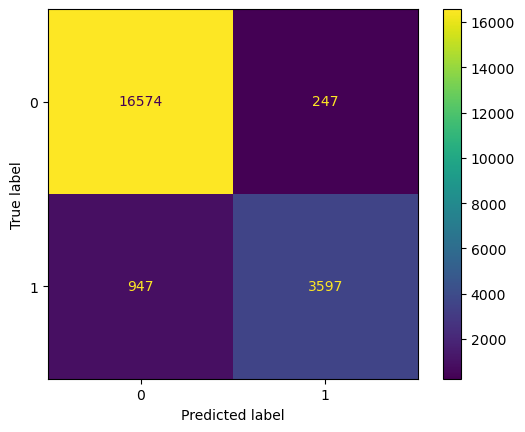

In [81]:
best_params
display_cv(best_model_XGB,cleaned_data , y)

In [53]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
cb.fit(x_train,y_train)
cb.score(x_train,y_train)
cb.score(x_test,y_test)
y_pred = cb.predict(x_test)

Learning rate set to 0.032702
0:	learn: 0.6696002	total: 155ms	remaining: 2m 34s
1:	learn: 0.6477958	total: 160ms	remaining: 1m 20s
2:	learn: 0.6261034	total: 166ms	remaining: 55.1s
3:	learn: 0.6065678	total: 171ms	remaining: 42.6s
4:	learn: 0.5882760	total: 177ms	remaining: 35.2s
5:	learn: 0.5717004	total: 182ms	remaining: 30.2s
6:	learn: 0.5586073	total: 188ms	remaining: 26.6s
7:	learn: 0.5450499	total: 193ms	remaining: 24s
8:	learn: 0.5322933	total: 199ms	remaining: 21.9s
9:	learn: 0.5208610	total: 204ms	remaining: 20.2s
10:	learn: 0.5089577	total: 211ms	remaining: 18.9s
11:	learn: 0.4984601	total: 218ms	remaining: 18s
12:	learn: 0.4887901	total: 225ms	remaining: 17.1s
13:	learn: 0.4804599	total: 231ms	remaining: 16.3s
14:	learn: 0.4731180	total: 237ms	remaining: 15.6s
15:	learn: 0.4662764	total: 242ms	remaining: 14.9s
16:	learn: 0.4598359	total: 248ms	remaining: 14.3s
17:	learn: 0.4530180	total: 253ms	remaining: 13.8s
18:	learn: 0.4470459	total: 259ms	remaining: 13.4s
19:	learn: 0.

In [54]:
print("------------------CatBoost Classifier---------------------------------")
print("For Y variable")
print("---------------------------------------------------------------------")
print(f'the Accuracy score for H1N1 vaccine : {accuracy_score(y_test,y_pred)}')
print("---------------------------------------------------------------------")
print(f'the classification report for H1N1 vaccine : {classification_report(y_test,y_pred)}')
print("---------------------------------------------------------------------")
print(f'the confusion matrix for H1N1 vaccine : {confusion_matrix(y_test,y_pred)}')
print("---------------------------------------------------------------------")

------------------CatBoost Classifier---------------------------------
For Y variable
---------------------------------------------------------------------
the Accuracy score for H1N1 vaccine : 0.8561622464898596
---------------------------------------------------------------------
the classification report for H1N1 vaccine :               precision    recall  f1-score   support

           0       0.88      0.95      0.91      5024
           1       0.74      0.51      0.61      1386

    accuracy                           0.86      6410
   macro avg       0.81      0.73      0.76      6410
weighted avg       0.85      0.86      0.85      6410

---------------------------------------------------------------------
the confusion matrix for H1N1 vaccine : [[4779  245]
 [ 677  709]]
---------------------------------------------------------------------


In [55]:
import optuna
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000, step=200),
        'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.3),
        'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1,10),
        "depth": trial.suggest_int("max_depth", 2,10),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
        }
    from catboost import CatBoostClassifier
    model = CatBoostClassifier(**param)
    model.fit(x_train, y_train, early_stopping_rounds=50, verbose=False)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    return acc
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
study.best_params
study.best_value

[I 2024-05-29 18:03:04,286] A new study created in memory with name: no-name-dd0a9922-2734-472b-9ac1-80edb0febf9c
C:\ANA\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [100, 1000] and step=200, but the range is not divisible by `step`. It will be replaced by [100, 900].
  warnings.warn(
C:\Users\俊俊\AppData\Local\Temp\ipykernel_25752\484094950.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
[I 2024-05-29 18:03:04,801] Trial 0 finished with value: 0.8497659906396255 and parameters: {'iterations': 100, 'learning_rate': 0.035894396442059134, 'min_data_in_leaf': 4, 'max_depth': 5, 'l2_leaf_reg': 9.47666119413604e-05}. Best is trial 0 with value: 0.8497659906396255.
C:\ANA\Lib\site-packages\optuna\distributions.py:700:

0.858814352574103

In [74]:
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000, step=200),
        'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.3),
        'random_strength':trial.suggest_int("random_strength", 1,10),
        'bagging_temperature':trial.suggest_int("bagging_temperature", 0,10),
        'max_bin':trial.suggest_int('max_bin', 1,30),
        'grow_policy':trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1,10),
        "depth": trial.suggest_int("max_depth", 2,10),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
        'auto_class_weights':trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
        }

    from catboost import CatBoostClassifier
    model = CatBoostClassifier(**param)
    model.fit(x_train, y_train, early_stopping_rounds=50, verbose=False)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    return acc
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
study.best_params
study.best_value

[I 2024-05-29 19:14:01,420] A new study created in memory with name: no-name-689c8475-78fc-4787-b52d-cdc5f7014f97
C:\ANA\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [100, 1000] and step=200, but the range is not divisible by `step`. It will be replaced by [100, 900].
  warnings.warn(
C:\Users\俊俊\AppData\Local\Temp\ipykernel_25752\2033722853.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
[I 2024-05-29 19:14:04,190] Trial 0 finished with value: 0.8419656786271451 and parameters: {'iterations': 500, 'learning_rate': 0.13232555266631332, 'random_strength': 7, 'bagging_temperature': 10, 'max_bin': 29, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 2, 'max_depth': 2, 'l2_leaf_reg': 1.3978496463640443e-06, 'auto_c

0.8524180967238689

In [75]:
best_params = study.best_params
print("Best Parameters: ", best_params)
print("Best Accuracy: ", study.best_value)

Best Parameters:  {'iterations': 700, 'learning_rate': 0.020215803120752895, 'random_strength': 3, 'bagging_temperature': 2, 'max_bin': 21, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 10, 'max_depth': 10, 'l2_leaf_reg': 1.3790588634537881, 'auto_class_weights': 'SqrtBalanced'}
Best Accuracy:  0.8524180967238689


In [76]:
best_model = CatBoostClassifier(**best_params)
best_model.fit(x_train, y_train, early_stopping_rounds=50, verbose=True)


0:	learn: 0.6815874	total: 21.8ms	remaining: 15.3s
1:	learn: 0.6705641	total: 42.8ms	remaining: 14.9s
2:	learn: 0.6609064	total: 62.9ms	remaining: 14.6s
3:	learn: 0.6506499	total: 83.4ms	remaining: 14.5s
4:	learn: 0.6421343	total: 104ms	remaining: 14.4s
5:	learn: 0.6325351	total: 124ms	remaining: 14.4s
6:	learn: 0.6245241	total: 144ms	remaining: 14.2s
7:	learn: 0.6162135	total: 163ms	remaining: 14.1s
8:	learn: 0.6088154	total: 183ms	remaining: 14.1s
9:	learn: 0.6009587	total: 204ms	remaining: 14.1s
10:	learn: 0.5941832	total: 225ms	remaining: 14.1s
11:	learn: 0.5871656	total: 245ms	remaining: 14s
12:	learn: 0.5823015	total: 256ms	remaining: 13.5s
13:	learn: 0.5764657	total: 277ms	remaining: 13.6s
14:	learn: 0.5704984	total: 298ms	remaining: 13.6s
15:	learn: 0.5647957	total: 318ms	remaining: 13.6s
16:	learn: 0.5584722	total: 343ms	remaining: 13.8s
17:	learn: 0.5530626	total: 363ms	remaining: 13.8s
18:	learn: 0.5479949	total: 383ms	remaining: 13.7s
19:	learn: 0.5423410	total: 403ms	remai

In [79]:
best_params

{'iterations': 700,
 'learning_rate': 0.020215803120752895,
 'random_strength': 3,
 'bagging_temperature': 2,
 'max_bin': 21,
 'grow_policy': 'SymmetricTree',
 'min_data_in_leaf': 10,
 'max_depth': 10,
 'l2_leaf_reg': 1.3790588634537881,
 'auto_class_weights': 'SqrtBalanced'}

0:	learn: 0.6819327	total: 23.6ms	remaining: 16.5s
1:	learn: 0.6721585	total: 45.5ms	remaining: 15.9s
2:	learn: 0.6622909	total: 67.9ms	remaining: 15.8s
3:	learn: 0.6553698	total: 78.2ms	remaining: 13.6s
4:	learn: 0.6462026	total: 101ms	remaining: 14.1s
5:	learn: 0.6363630	total: 125ms	remaining: 14.5s
6:	learn: 0.6279855	total: 148ms	remaining: 14.6s
7:	learn: 0.6192942	total: 170ms	remaining: 14.7s
8:	learn: 0.6122767	total: 193ms	remaining: 14.8s
9:	learn: 0.6048089	total: 215ms	remaining: 14.9s
10:	learn: 0.5975765	total: 237ms	remaining: 14.9s
11:	learn: 0.5899186	total: 261ms	remaining: 15s
12:	learn: 0.5832847	total: 283ms	remaining: 15s
13:	learn: 0.5772189	total: 305ms	remaining: 15s
14:	learn: 0.5709975	total: 327ms	remaining: 14.9s
15:	learn: 0.5646429	total: 349ms	remaining: 14.9s
16:	learn: 0.5586778	total: 371ms	remaining: 14.9s
17:	learn: 0.5536993	total: 394ms	remaining: 14.9s
18:	learn: 0.5489729	total: 416ms	remaining: 14.9s
19:	learn: 0.5439677	total: 437ms	remaining

'results f1: 0.7638949402835452'

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     16821
           1       0.90      0.90      0.90      4544

    accuracy                           0.96     21365
   macro avg       0.94      0.93      0.93     21365
weighted avg       0.96      0.96      0.96     21365

auc: 0.9341490644344634


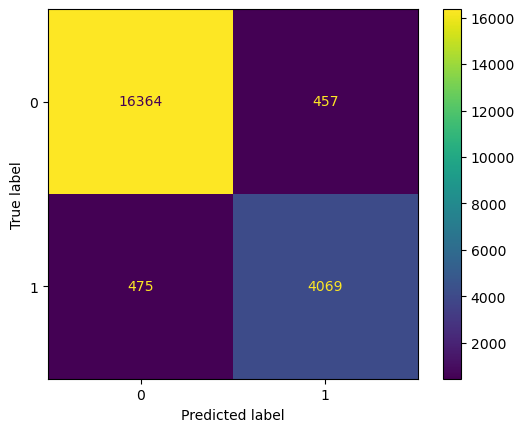

In [77]:

display_cv(best_model,cleaned_data , y)


In [60]:
y_pred = best_model.predict(x_test)
final_accuracy = accuracy_score(y_test, y_pred)
print("Final Accuracy on Test Set: ", final_accuracy)

Final Accuracy on Test Set:  0.858814352574103


In [63]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.8484269614308676